**Creators:** Sabrina Johnson, Jessenta Drake, Jason Romelus

**Project:** CSE 368 Final Project

**Overview:** Black Jack AI Agent

**Imports**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

**Helper Functions (called from BlackJack class)**

In [ ]:
class BlackJack():
  pass

In [ ]:
def calculate_sums(env: BlackJack):
  sum, ones = 0, 0
  # update agent
  for num in env.agent_cards:
    if num == 1:
      sum = sum + 11
      ones = ones + 1
    else:
      sum = sum + num

  while sum > 21 and ones != 0:
    sum = sum - 10
    ones = ones - 1

  env.agent_sum = sum

  sum, ones = 0, 0
  # update dealer
  for num in env.dealer_cards:
    if num == 1:
      sum = sum + 11
      ones = ones + 1
    else:
      sum = sum + num

  while sum > 21 and ones != 0:
    sum = sum - 10
    ones = ones - 1

  env.dealer_sum = sum

In [ ]:
'''
Ace: 1 or 11
2-9 : is the value
Jack, Queen and King : 10
'''
def generate_card(env: BlackJack):
  # get random index
  index = random.randint(1, len(env.deck)) - 1
  # get value at that index
  card = env.deck[index]
  # remove that card from the deck
  env.deck.pop(index)
  # return that card
  return card

In [ ]:
def update_dealer(env: BlackJack):
  calculate_sums(env)
  while env.dealer_sum < 17:
    env.dealer_cards.append(generate_card(env))
    calculate_sums(env)
  return True

In [ ]:
def update_agent(env: BlackJack):
  env.agent_cards.append(generate_card(env))
  calculate_sums(env)
  if env.agent_sum >= 21:
    return True
  return False

In [ ]:
def determine_winner(env: BlackJack, action): # 0 is agent and 1 is dealer
  if env.agent_sum == 21:
    return 'agent'
  elif env.dealer_sum == 21:
    return 'dealer'
  elif action == 0 and env.agent_sum > env.dealer_sum:
    return 'agent'
  elif action == 0 and env.agent_sum < env.dealer_sum:
    return 'dealer'
  elif action == 0 and env.agent_sum == env.dealer_sum:
    return 'draw'

In [ ]:
def calculate_state(env: BlackJack):
  if env.agent_sum > 21 or env.dealer_sum > 21:
    return None
  state = (env.agent_sum * 20) + env.dealer_sum
  # print('state returned: ' + str(state))
  return state

In [ ]:
def calculate_reward(env: BlackJack, winner):
  if winner == 'dealer' or winner == 'draw':
    env.win_streak = 0
    return 0
  elif winner == 'agent':
    env.win_streak = env.win_streak + 1
    return int(2 ** (env.win_streak - 1))

**Class Definition**

In [ ]:
class BlackJack():
  def __init__(self, epsilon, epsilon_decay, alpha):
    # learning variables (in use)
    self.epsilon_orig = epsilon
    self.epsilon = epsilon
    self.epsilon_decay = epsilon_decay
    self.alpha = alpha
    self.actions = [0,1]
    self.win_streak = 0

    # env variables
    self.deck = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10]
    self.agent_sum = generate_card(self)
    self.dealer_sum = generate_card(self)
    self.agent_cards = [self.agent_sum]
    self.dealer_cards = [self.dealer_sum]
    self.last_action = -1

  def reset(self):
    # reset epsilon
    self.epsilon = self.epsilon_orig

    # reset env variables
    self.deck = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10]
    self.agent_sum = generate_card(self)
    self.dealer_sum = generate_card(self)
    self.agent_cards = [self.agent_sum]
    self.dealer_cards = [self.dealer_sum]

  def step(self, action): # update epsilon in this function and calculate reward here, return vars for observation
    ''' given an action and the state, we give rewards based on the sepcified threshold (in word doc)
        so detrming reward before calling update functions
    '''
    # store current state
    # maybe you want a list of all the cards pulled for each person (agent and dealer)
    reward, state_orig = 0, calculate_state(self)

    # update hands
    if action == 0: # stand
      self.last_action = 0
      terminated = update_dealer(self)
    elif action == 1: # hit
      self.last_action = 1
      terminated = update_agent(self)

    # update sums
    calculate_sums(self)
    state_new = calculate_state(self)

    if terminated:
      winner = determine_winner(self, action)
      reward = calculate_reward(self, winner)

    # update learning variables
    self.epsilon = self.epsilon_orig

    # return observations
    return state_orig, reward, terminated

  # epsilon greedy func
  def choose_action(self, qtable):
    if random.uniform(0,1) < self.epsilon:
      # choose random actioon
      action = np.random.choice(self.actions)
      return action
    else:
      # choose greedy
      action = self.greedy_action(qtable)
      return action

  # returns the best action for where the agent is currently at
  def greedy_action(self, qtable):
    q_values = Q[self.agent_sum]
    greedy_action = np.argmax(q_values)
    return greedy_action

  def render(self):
    plt.figure(figsize=(8, 4))
    plt.title('Blackjack Game Visualization')
    plt.xlabel('Cards')
    plt.ylabel('Sum')

    # Opaque green background
    plt.fill_between([-1, len(self.agent_cards) + 1], 0, 25, color='green', alpha=0.3)

    # Annotate agent's cards
    for i, card_value in enumerate(self.agent_cards):
        plt.text(i, card_value, str(card_value), verticalalignment='center', horizontalalignment='center', color='blue', fontsize=12)

    # Annotate dealer's first card
    plt.text(0, self.dealer_cards[0], str(self.dealer_cards[0]), verticalalignment='center', horizontalalignment='center', color='red', fontsize=12)

    # Sum annotations on the right
    agent_sum_x = len(self.agent_cards) + 0.1  # Move to the right
    dealer_sum_x = len(self.agent_cards) + 0.1  # Move to the right
    plt.text(agent_sum_x, self.agent_sum, f'Agent Sum: {self.agent_sum}', verticalalignment='center', horizontalalignment='left', color='blue')
    plt.text(dealer_sum_x, self.dealer_cards[0], f'Dealer Sum: {self.dealer_cards[0]}', verticalalignment='center', horizontalalignment='left', color='red')

    plt.axhline(y=21, color='green', linestyle='--', label='Winning Threshold')

    # Hide the spines (axes lines)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.legend()

    # Remove grid and ticks
    plt.grid(False)
    plt.xticks([])
    plt.show()


**Visualization**

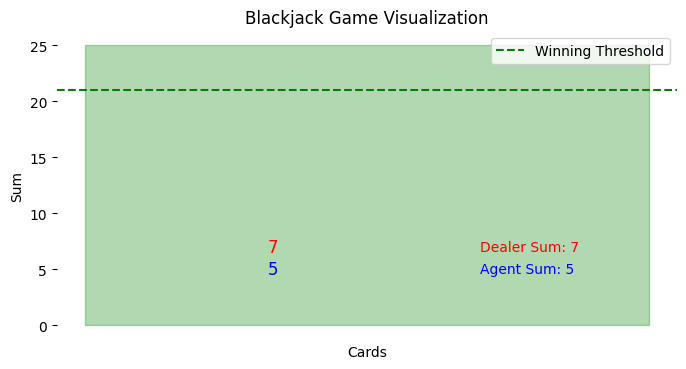

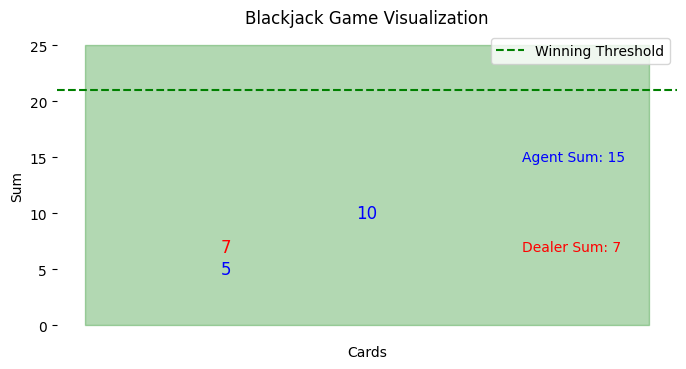

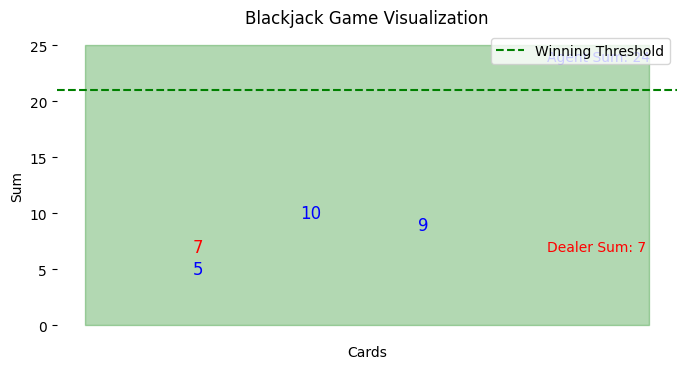

In [ ]:
# ... (your existing code)

# Create an instance of the Blackjack class
blackjack_game = BlackJack(epsilon=0.1, epsilon_decay=0.99, alpha=0.1)
blackjack_game.render()

# Game loop
for _ in range(10):  # Replace 10 with the desired number of steps in your game
    state, reward, terminated = blackjack_game.step(1)  # Replace qtable with your Q-table

    # Add this line to visualize the game state after each step
    blackjack_game.render()

    if terminated:
      break
        # blackjack_game.reset()  # Reset the game after it terminates


**Training (Q-Learning)**

*See Q-tables here*

In [ ]:
# Trains multiple episodes
def updateq(old_state, new_state, reward, action, next_action):
      # print("Q table is before updating is: ", Q)
      curr_qval = Q[old_state, action]
      # Find the maximum Q-value for the next state
      max_next_qval = np.max(Q[new_state])
      # Calculate the target Q-value using the Q-learning update rule
      target_qval = reward + gamma * max_next_qval
      # Update the Q-value for the current state and action
      Q[old_state, action] = curr_qval + alpha * (target_qval - curr_qval)
      # print("Our Q table after updating is: ", Q)

def q_learning(alpha, epsilon, env):
  print("The initial Q-Table is:\n", Q)
  wins = []

  for episode in range(total_episodes):
    # reset environment
    env.reset()
    state = calculate_state(env) #0s
    terminated = False
    if terminated:
      print("Q LEARNING TERMINATED")
      break
    # got rid of steps because I dont think there are any
    while not terminated:
      action = env.choose_action(Q)

      observation, reward, terminated = env.step(action)

      next_action = env.choose_action(Q)

      next_observation, next_reward, terminated = env.step(next_action)

      if observation != None and next_observation != None:
        updateq(observation, next_observation, reward, action, next_action)

      observation = next_observation
      if reward is not None and next_reward is not None:
        wins.append((episode, reward + next_reward))
      # print('Action:', action, ', Reward:', reward, ', Done:', terminated)

  print('For episode: {}, the final Q table is:\n {}'.format(episode, Q))
  # return list of points for 'wins' graph
  return Q, wins

In [ ]:
''' main function to train agent '''
# training variables
epsilon = 1 #start with 1 and slowly decrease to 0.01; min val=0.01
total_episodes = 10000 #TUNED PARAMETER - 31 is good, min of 1000 eps
#max_steps = 1000 #TUNED PARAMETER
alpha = 0.1 #btwn 0.1 - 0.2
gamma = 0.9 #btwn 0.9 - 0.99;
Q = np.zeros([500,2])


myenv = BlackJack(0.96,.995,.23)
obs = myenv.reset()
terminated = False
print('=== Running Double Q Learning ===')
Q_final, data = q_learning(alpha, epsilon, myenv) # data is a list of points used in the following cells

=== Running Double Q Learning ===
The initial Q-Table is:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 

**Demo:** Play one game with only greedy actions

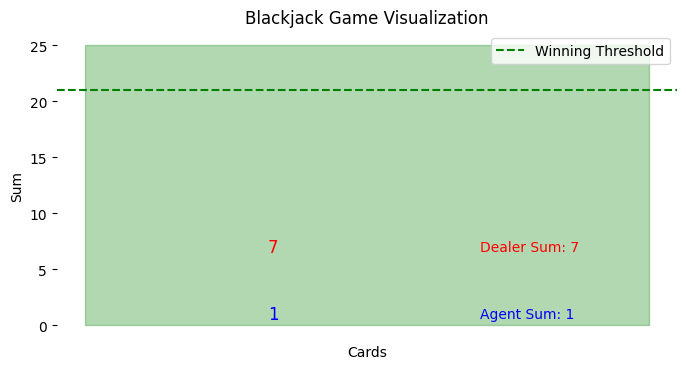

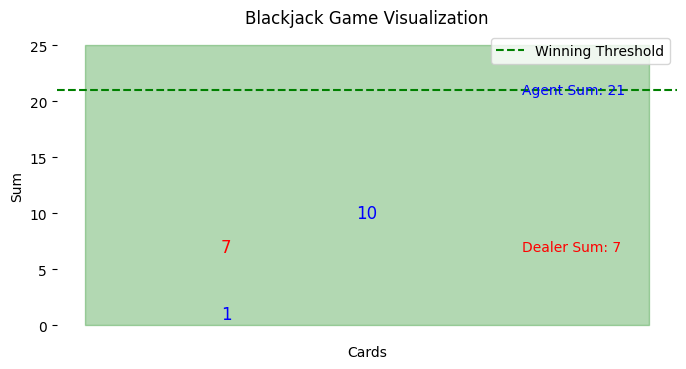

winner is the ... agent


In [ ]:
# play one game with the final q table and all greedy actions
myenv.reset()
terminated = False

while not terminated:
  myenv.render()
  action = np.argmax(Q_final[calculate_state(myenv)])
  next_observation, next_reward, terminated = myenv.step(action)
myenv.render()

# display winner
winner = determine_winner(myenv, myenv.last_action)
print('winner is the ... ' + str(winner))

**Graphs**

Graph of Reward at Given Episode

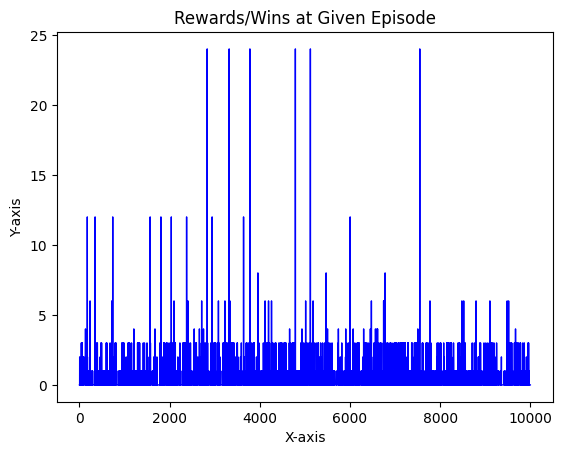

In [ ]:
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
plt.plot(x_val, y_val, linestyle='-', color='b', linewidth=1)
plt.title('Rewards/Wins at Given Episode')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()

Graph of Epsilon Decay Rate Over 1000 Episodes

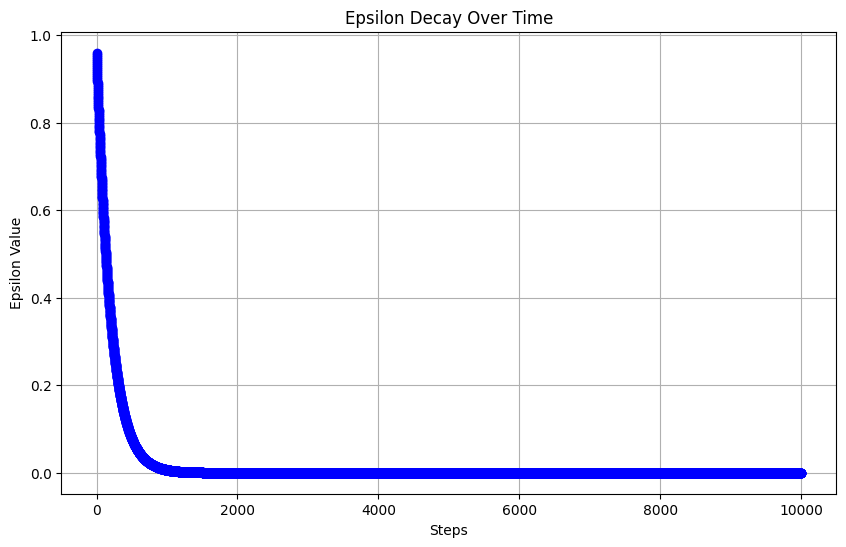

In [ ]:
def decay_epsilon(initial_epsilon, decay_rate, num_steps):
    epsilon_values = [initial_epsilon * (decay_rate ** i) for i in range(num_steps)]
    return epsilon_values

# Generate epsilon values over time
epsilon_values = decay_epsilon(.96, .995, 10000)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(10000), epsilon_values, marker='o', linestyle='-', color='b', linewidth=.05)
plt.title('Epsilon Decay Over Time')
plt.xlabel('Steps')
plt.ylabel('Epsilon Value')
plt.grid(True)
plt.show()